# Laboratorio di Simulazione Numerica
## Esercitazione 4

### Esercizio 04.1
In questo esercizio vogliamo migliorare il codice di simulazione di Dinamica Molecolare che sfrutta l'algoritmo di Verlet, fornito durante il *Laboratorio di Simulazione Numerica*. Volgiamo introdurre la possibiltà, nel momento in cui avviamo una simulazione, di partire non solo da una configurazione attuale (quella salvata in *config.0*), ma anche da una configurazione precedente, in modo da usare fin dal primo passo l'algoritmo di Verlet. Il problema è che partendo solo da una configurazione attuale siamo costretti a dover generare delle velocità iniziale che rispecchino il più possibile la temperatura che abbiamo assegnato. Nel codice le velocità vengono generate uniformemente in un cubo (il cui lato dipende dalla temperatura che vogliamo simulare), ma sappiamo che in realtà la distribuzione è diversa (come nel caso della distribuzione di Maxwell per un Gas ideale). Per questo se eseguiamo la simulazione una volta si vede bene che all'inizio il sistema è alla temperatura imposta, ma poi subisce una rapida variazione fino ad arrivare ad oscillare attorno a un altro valore, come mostrato nel grafico sottostante. 

<img src="MolecularDynamics_NVE/images/Temperature_solid_1.png" width="700">
Nel grafico è mostrato l'andamento della temperatura in funzione del tempo durante una simulazione di Dinamica Molecolare, in particolare si stà simulando la dinamica dell'Argon in fase solida:

- **Argon:** $\sigma = 0.34 \: nm$, $\epsilon/k_B = 120 \: K$, $m=39.948 \: amu$
- **Fase Solida:** $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$

Le quantità rappresentate sono espresse in unità di Lennard-Jones

Si vede appunto che la temperatura ha una brusca variazione iniziale, mentre noi vogliamo eseguire una simulazione alla temperatura scelta. La possibilità di far ripartire la simulazione tenendo conto anche di una configurazione precedente a quella attuale permette di avere una velocità iniziale che segua una distribuzione più "fisica", dettata dalla simulazione del sistema precedente.

Per fare questo, nel codice di Dinamica Molecolare sono state modificate principalmente le funzioni *Input()* e *ConfFinal()* e il file "input.dat". In quest'ultimo è stata semplicemente aggiunta una riga a inizio file contenente un valore *Booleano* (*e.g.* 0 o 1). La funzione *Input()* ora legge anche questo valore e lo memorizza nella variabile Booleana *reset*.

- se reset = true (1), allora la simulazione comincia considerando solo la configurazione attuale
- se reset = false (0), allora la simulazione comincia considerando sia la configurazione attuale che quella precedente

Il procedimento per equilibrare il nostro stato termodinamico è il seguente:

1. Si esegue la simulazione una prima volta tenendo conto solo della configurazione iniziale in config.0 (quindi il  primo valore di *input.dat* deve essere $1$). Per compilare ed eseguire ci sono i due comandi **Compila** ed **Esegui** nel *makefie*.
La funzione *ConfFinal* ora oltre a salvare la configurazione finale in *config.final* salva anche la penultima configurazione in *old.final*

2. Tramite il comando **Continue** del *makefile* si copiano le configurazioni in *config.final* e *old.final* in *config.0* e *old.0*. Per poter ripartire utilizzando la configurazione precedente bisogna anche modificare la prima riga del file *input.dat* mettendo $0$ al posto di $1$, poi si usa sempre il comando **Esegui** del *makefile*. 

3. Il punto precedente va ripetuto finchè non ci sia più alcun balzo iniziale della temperatura e che fin dall'inizio questa oscilli attorno al valore desiderato.



Nei grafici sottostanti sono mostrati gli andamenti della temperatura in funzione del tempo in diverse simulazioni successeive della Dinamica Molecolare dell'Argon, in fase Solida e Gassosa.

- Fase Solida: $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$)
- Fase Gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$)

dove: $\rho^\star$ è la Densità, $T^\star$ è la Temperatura, $r_c$ è il Raggio di cut-off, tutti espressi in Unità di Lennard-Jones.
In gueste paricolari simulazioni che servono principalmente ad equilibrare lo stato termodinamico iniziale si eseguno solo $10^4$ passi di integrazione, dove un passo di integrazione corrisponde a $5 \cdot 10^{-4}$ in unità di Lennard-Jones, cioè a circa $1.075 fs$ nel nostro caso (Argon).

## Fase Solida

### Simulazione 1
<img src="MolecularDynamics_NVE/images/Temperature_solid_1.png" width="400">

<!--
 ### Simulazione 2
<img src="MolecularDynamics_NVE/images/Temperature_solid_2.png" width="400">
-->

### Simulazione 3
<img src="MolecularDynamics_NVE/images/Temperature_solid_3.png" width="400">

<!--
### Simulazione 4
<img src="MolecularDynamics_NVE/images/Temperature_solid_4.png" width="400">
-->

### Simulazione 5
<img src="MolecularDynamics_NVE/images/Temperature_solid_5.png" width="400">

Nell'ultimo grafico si vede come siamo riusciti, alla quinta simulazione a ad arrivare a delle configurazioni compatibili con lo stato termodinamico da noi scelto, cioè abbiamo dei valori di temperatura che oscillano attorno al valore $0,8$

## Fase Gassosa

### Simulazione 1
<img src="MolecularDynamics_NVE/images/Temperature_gas_1.png" width="400">

<!--
### Simulazione 2
<img src="MolecularDynamics_NVE/images/Temperature_gas_2.png" width="400">
-->

### Simulazione 3
<img src="MolecularDynamics_NVE/images/Temperature_gas_3.png" width="400">

### Simulazione 4
<img src="MolecularDynamics_NVE/images/Temperature_gas_4.png" width="400">

<!--
### Simulazione 5
<img src="MolecularDynamics_NVE/images/Temperature_gas_5.png" width="400">

### Simulazione 6
<img src="MolecularDynamics_NVE/images/Temperature_gas_6.png" width="400">

### Simulazione 7
<img src="MolecularDynamics_NVE/images/Temperature_gas_7.png" width="400">

### Simulazione 8
<img src="MolecularDynamics_NVE/images/Temperature_gas_8.png" width="400">
-->

### Simulazione 9
<img src="MolecularDynamics_NVE/images/Temperature_gas_9.png" width="400">

In questa si vede come allo stato Gassoso si abbiano delle fluttuazioni molto maggiori. Alla *Simulazione 3* la temperatura sembra essersi stabilizzata attorno al valore scelto $1.2$, ma nella simulazione successiva si discosta nettamente da questo valore arrivando attorno a $1.28$. Nelle simulazioni successive poi effettivamente arriva a oscillare attorno al valore scelto, però sempre con delle fluttuazioni molto elevate (le oscillazioni arrivano fino a 0.5, mentre quelle per la fase solida sono di circa 0.1)

## Fase Liquida

Lo stesso procedimento viene eseguito con la fase liquida:

- Fase Liquida: $\rho^\star = 0.8$, $T^\star = 1.1$,$r_c = 2.5$

Come potevamo aspettarci, per raggiungere la fase di equilibrio nel caso liquido sono state necessarie più simulazioni rispetto alla fase solida e meno simulazioni rispetto alla fase gassosa.

### Simulazione 1
<img src="MolecularDynamics_NVE/images/Temperature_liquid_1.png" width="400">

<!--
### Simulazione 2
<img src="MolecularDynamics_NVE/images/Temperature_liquid_2.png" width="400">

### Simulazione 3
<img src="MolecularDynamics_NVE/images/Temperature_liquid_3.png" width="400">
-->

### Simulazione 4
<img src="MolecularDynamics_NVE/images/Temperature_liquid_4.png" width="400">

<!--
### Simulazione 5
<img src="MolecularDynamics_NVE/images/Temperature_liquid_5.png" width="400">

### Simulazione 6
<img src="MolecularDynamics_NVE/images/Temperature_liquid_6.png" width="400">
-->

### Simulazione 7
<img src="MolecularDynamics_NVE/images/Temperature_liquid_7.png" width="400">

Le configuarazioni ottenute al termine dei tre cicli di simulazioni per le tre fasi vengono salvate nelle directory *config_solid*, *config_liquid* e *config_gas*, per poter essere utilizzate nelle simulazioni effettive dell'esercitazione.

### Esercizio 04.2 - Esercizio 04.3

In questo esercizio implementiamo il *Data Blocking* nel codice di Dinamica Molecolare per poter valutare l'incertezza sui valori medi di Energia Potenziale per particella $V/N$, Energia Cinetica per particella $K/N$, Energia Totale per particella $E/N$ e Temperatura $T$.
Per mostrare il funzionamento del *data blocking* (la cui implementazione si trova nel *main()* del codice di dinamica molecolare), viene eseguita una simulazione da $2 \cdot 10^5$ passi divisi in 100 blocchi, per tutte tre le fasi. Per la simulazione si parte dalle configurazioni a cui siamo giunti con le simulazioni dell'esercizio precedente.


## Fase Solida

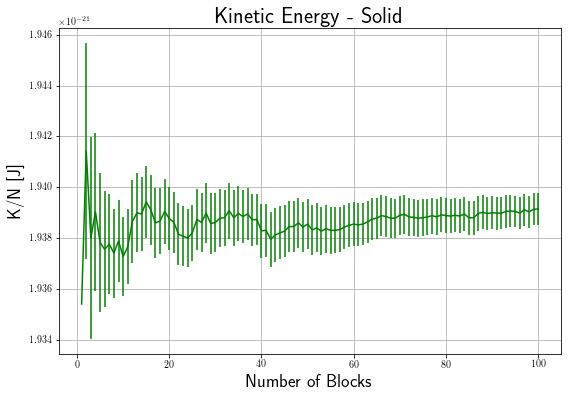

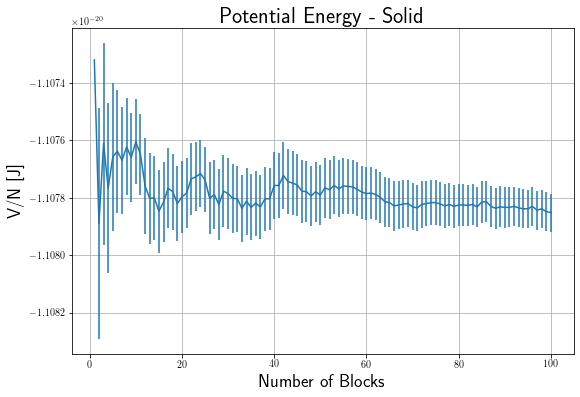

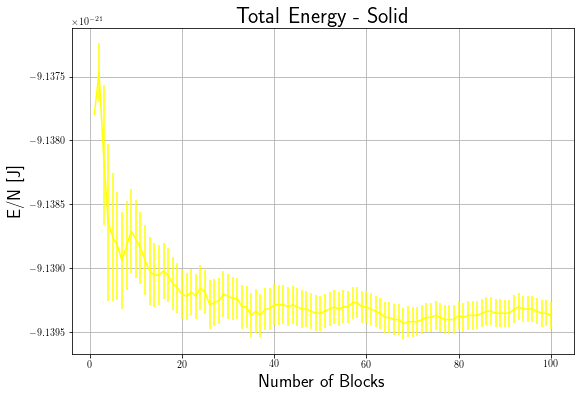

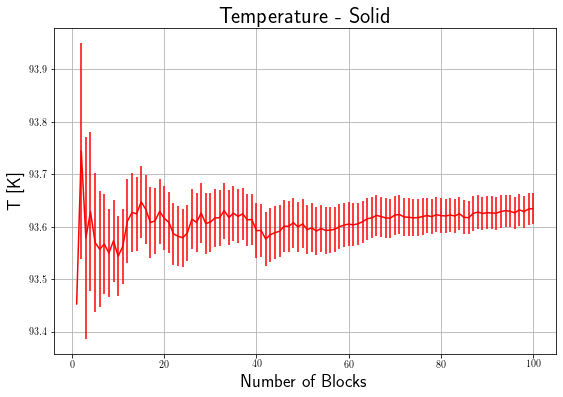

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as const
from scipy.constants import physical_constants
from math import sqrt

######## ARGON ########

sigma = 0.34e-9
T0 = 120
m = 39.948 * physical_constants['atomic mass constant'][0]
epsilon = T0 * const.k
time0 = sigma * sqrt(m / epsilon)
P0 = epsilon / (sigma**3)

#######################


plt.rc('text', usetex=True)

k, errk = np.loadtxt("MolecularDynamics_NVE/ave_solid/ave_ekin.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
v, errv = np.loadtxt("MolecularDynamics_NVE/ave_solid/ave_epot.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
e, erre = np.loadtxt("MolecularDynamics_NVE/ave_solid/ave_etot.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
t, errt = np.loadtxt("MolecularDynamics_NVE/ave_solid/ave_temp.out", usecols = (0,1), delimiter=' ', unpack ='true') * T0

x = np.arange(len(t)) +1 

plt.figure(figsize=(9,6))
plt.errorbar(x, k, yerr=errk, color='green')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title('Kinetic Energy - Solid', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, v, yerr=errv)
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('V/N [J]',fontsize=18)
plt.title('Potential Energy - Solid', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, e, yerr=erre, color='yellow')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)
plt.title('Total Energy - Solid', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, t, yerr=errt, color='red')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('T [K]', fontsize=18)
plt.title('Temperature - Solid', fontsize=22)
plt.grid(True)

plt.show()

## Fase Gassosa

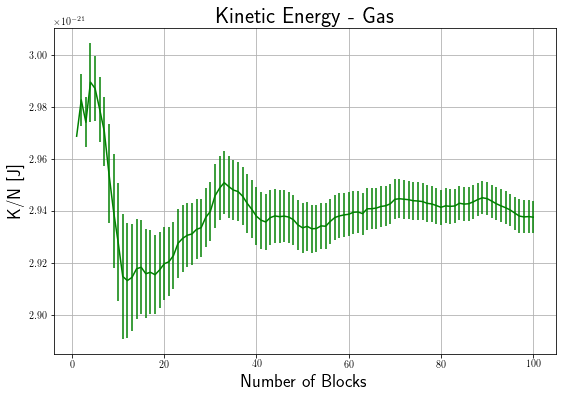

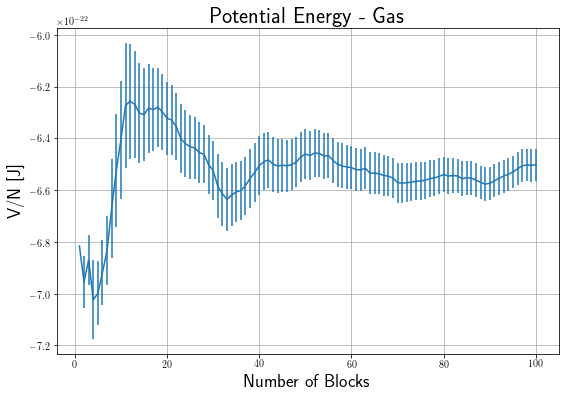

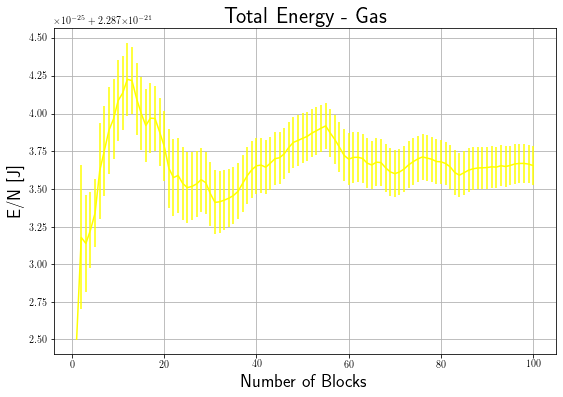

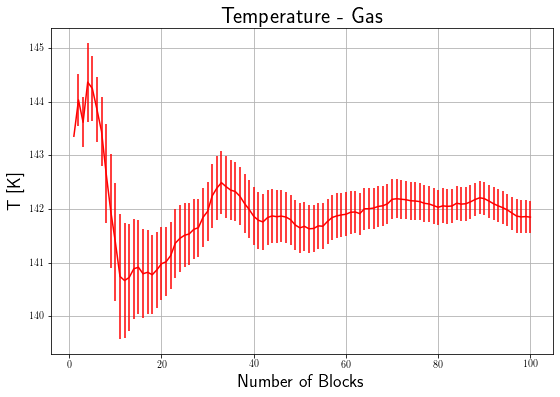

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as const
from scipy.constants import physical_constants
from math import sqrt

######## ARGON ########

sigma = 0.34e-9
T0 = 120
m = 39.948 * physical_constants['atomic mass constant'][0]
epsilon = T0 * const.k
time0 = sigma * sqrt(m / epsilon)
P0 = epsilon / (sigma**3)

#######################


plt.rc('text', usetex=True)

k, errk = np.loadtxt("MolecularDynamics_NVE/ave_gas/ave_ekin.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
v, errv = np.loadtxt("MolecularDynamics_NVE/ave_gas/ave_epot.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
e, erre = np.loadtxt("MolecularDynamics_NVE/ave_gas/ave_etot.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
t, errt = np.loadtxt("MolecularDynamics_NVE/ave_gas/ave_temp.out", usecols = (0,1), delimiter=' ', unpack ='true') * T0

x = np.arange(len(t)) +1 

plt.figure(figsize=(9,6))
plt.errorbar(x, k, yerr=errk, color='green')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title('Kinetic Energy - Gas', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, v, yerr=errv)
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('V/N [J]',fontsize=18)
plt.title('Potential Energy - Gas', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, e, yerr=erre, color='yellow')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)
plt.title('Total Energy - Gas', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, t, yerr=errt, color='red')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('T [K]', fontsize=18)
plt.title('Temperature - Gas', fontsize=22)
plt.grid(True)

plt.show()

## Fase Liquida

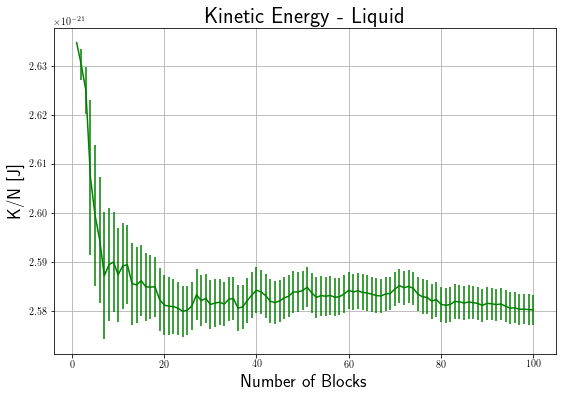

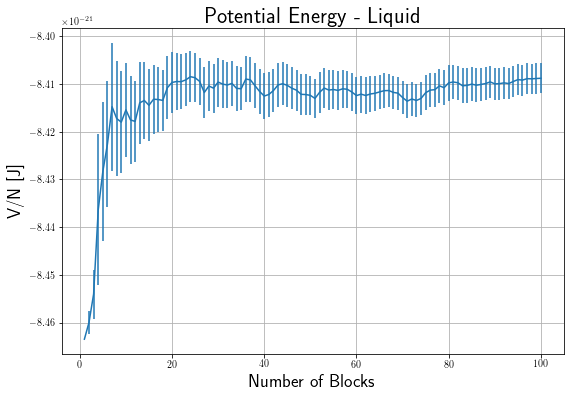

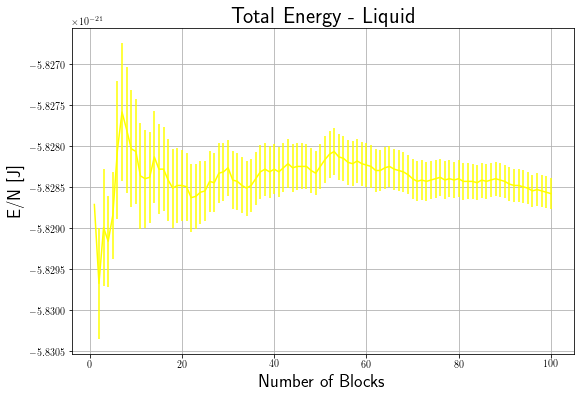

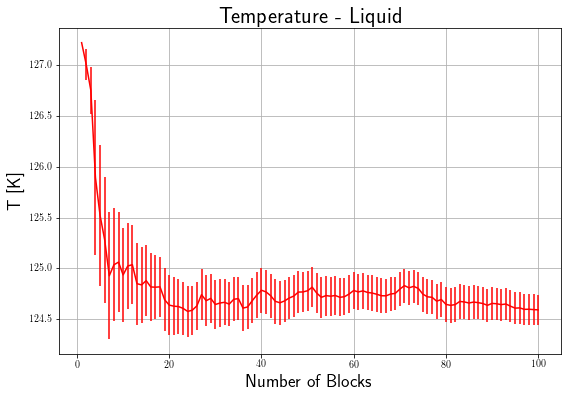

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as const
from scipy.constants import physical_constants
from math import sqrt

######## ARGON ########

sigma = 0.34e-9
T0 = 120
m = 39.948 * physical_constants['atomic mass constant'][0]
epsilon = T0 * const.k
time0 = sigma * sqrt(m / epsilon)
P0 = epsilon / (sigma**3)

#######################


plt.rc('text', usetex=True)

k, errk = np.loadtxt("MolecularDynamics_NVE/ave_liquid/ave_ekin.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
v, errv = np.loadtxt("MolecularDynamics_NVE/ave_liquid/ave_epot.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
e, erre = np.loadtxt("MolecularDynamics_NVE/ave_liquid/ave_etot.out", usecols = (0,1), delimiter=' ', unpack ='true') * epsilon
t, errt = np.loadtxt("MolecularDynamics_NVE/ave_liquid/ave_temp.out", usecols = (0,1), delimiter=' ', unpack ='true') * T0

x = np.arange(len(t)) +1 

plt.figure(figsize=(9,6))
plt.errorbar(x, k, yerr=errk, color='green')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title('Kinetic Energy - Liquid', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, v, yerr=errv)
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('V/N [J]',fontsize=18)
plt.title('Potential Energy - Liquid', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, e, yerr=erre, color='yellow')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)
plt.title('Total Energy - Liquid', fontsize=22)
plt.grid(True)

plt.figure(figsize=(9,6))
plt.errorbar(x, t, yerr=errt, color='red')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel('T [K]', fontsize=18)
plt.title('Temperature - Liquid', fontsize=22)
plt.grid(True)

plt.show()

### Esercizio Facoltativo
Nel codice di dinamica molecolare è stato implementato anche il calcolo per il valore di Pressione del sistema. Siccome l'espressione per il valore istantaneo di pressione coinvolge il valor medio del viriale nel tempo, nel codice è stato aggiunto una variabile  **vector** chiamata *virial* che contiene tutti i valori istantnaei di viriale. Per il calcolo della pressione a ogni passo quindi si sfrutta la media del viriale su tutti i passi precedenti. In questo modo si avranno dei valori di pressione imprecisi per quando riguarda i primi passi, ma che diventeranno via via più precisi. 
Nel grafico sottostante viene riportato l'anamento del valor medio della pressione e il relativo errore all'aumentare del numero di passi, sempre sfruttando il *data blocking* per la stima dell'incertezza.

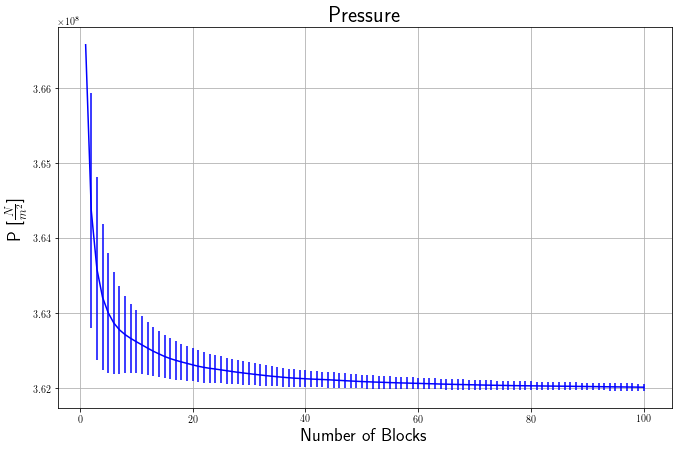

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as const
from scipy.constants import physical_constants
from math import sqrt

######## ARGON ########

sigma = 0.34e-9
T0 = 120.0
m = 39.948 * physical_constants['atomic mass constant'][0]
epsilon = T0 * const.k
time0 = sigma * sqrt(m / epsilon)
P0 = epsilon / (sigma**3)

#######################

plt.rc('text', usetex=True)

p, errp = np.loadtxt("MolecularDynamics_NVE/ave_solid/ave_pres.out", usecols = (0,1), delimiter=' ', unpack ='true') * P0
x = np.arange(len(p)) +1 

plt.figure(figsize=(11,7))
plt.errorbar(x, p, yerr=errp, color='blue')
plt.xlabel('Number of Blocks', fontsize=18)
plt.ylabel(r'P [$\frac{N}{m^2}$]', fontsize=18)
plt.title('Pressure', fontsize=22)
plt.grid(True)

plt.show()